In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot
from statsmodels.graphics.gofplots import qqplot

In [17]:
plt.style.use('seaborn-v0_8') 
sns.set_theme()
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [4]:
df = pd.read_csv('C:\\Users\\Anand Kumar\\Downloads\\Electric_Vehicle_Population_Data (2).csv')

In [5]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (235692, 17)


In [6]:
print("\nFirst 5 rows:")


First 5 rows:


In [7]:
#print(df.head())

   VIN (1-10)    County     City State  Postal Code  Model Year     Make  \
0  5YJ3E1EBXK      King  Seattle    WA      98178.0        2019    TESLA   
1  5YJYGDEE3L    Kitsap  Poulsbo    WA      98370.0        2020    TESLA   
2  KM8KRDAF5P    Kitsap   Olalla    WA      98359.0        2023  HYUNDAI   
3  5UXTA6C0XM    Kitsap  Seabeck    WA      98380.0        2021      BMW   
4  JTMAB3FV7P  Thurston  Rainier    WA      98576.0        2023   TOYOTA   

        Model                   Electric Vehicle Type  \
0     MODEL 3          Battery Electric Vehicle (BEV)   
1     MODEL Y          Battery Electric Vehicle (BEV)   
2     IONIQ 5          Battery Electric Vehicle (BEV)   
3          X5  Plug-in Hybrid Electric Vehicle (PHEV)   
4  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible           220.0   
1            Clean Alternative Fuel Vehicle Eligible    

In [8]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,5YJYGDEE3L,Kitsap,Poulsbo,WA,98370.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,23.0,109705683,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,KM8KRDAF5P,Kitsap,Olalla,WA,98359.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,230390492,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10
3,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.81585 47.64509),PUGET SOUND ENERGY INC,5.303509e+10
4,JTMAB3FV7P,Thurston,Rainier,WA,98576.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,236505139,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10


In [9]:
print("\nMissing values by column:")


Missing values by column:


In [10]:
print(df.isnull().sum())

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        36
Base MSRP                                             36
Legislative District                                 494
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64


In [13]:
categorical_cols = ['County', 'City', 'State', 'Electric Vehicle Type', 
                   'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Utility']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
df['Electric Range'] = df['Electric Range'].fillna(df['Electric Range'].median())
df = df.dropna(subset=['Make', 'Model', 'Model Year'])
df.columns = df.columns.str.strip()
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

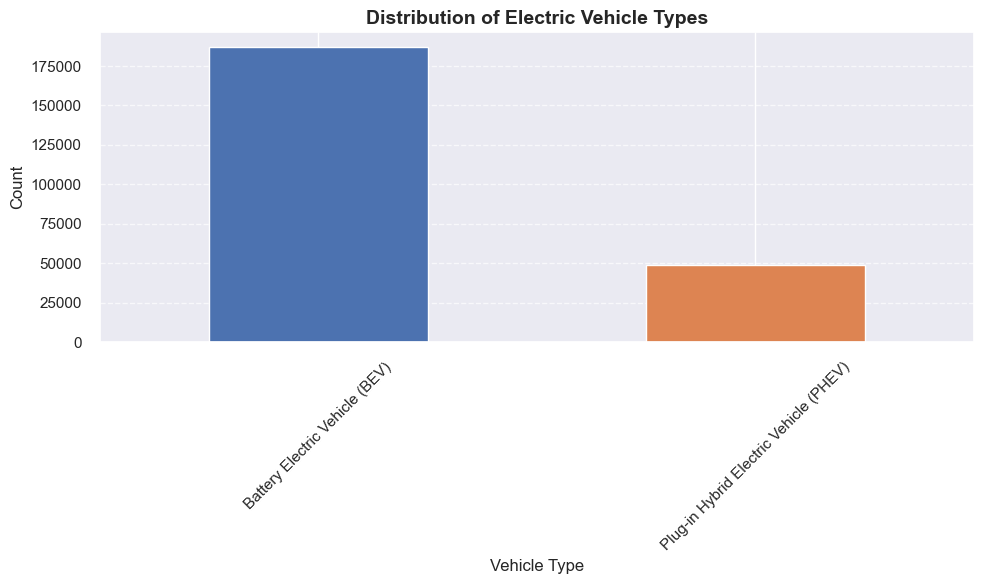

In [14]:
plt.figure(figsize=(10, 6))
ev_type_counts = df['Electric Vehicle Type'].value_counts()
ev_type_counts.plot(kind='bar', color=['#4C72B0', '#DD8452'])
plt.title('Distribution of Electric Vehicle Types', fontsize=14, fontweight='bold')
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

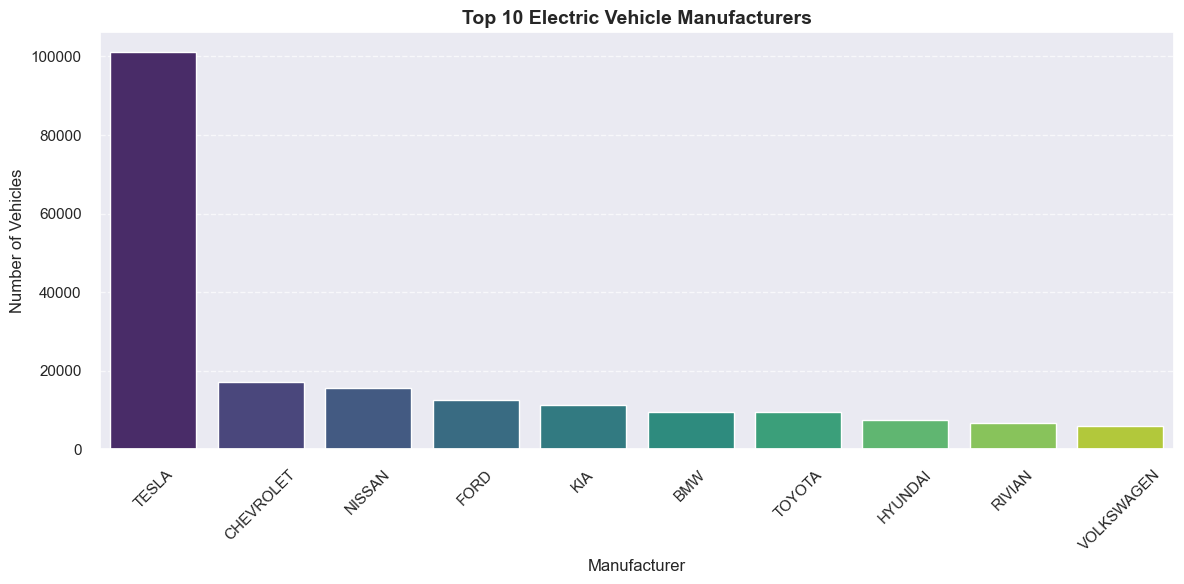

In [20]:
# Prepare data
top_makes = df['Make'].value_counts().nlargest(10)
top_makes_df = top_makes.reset_index()
top_makes_df.columns = ['Make', 'Count']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_makes_df, x='Make', y='Count', hue='Make', palette='viridis', legend=False)
plt.title('Top 10 Electric Vehicle Manufacturers', fontsize=14, fontweight='bold')
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Number of Vehicles', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


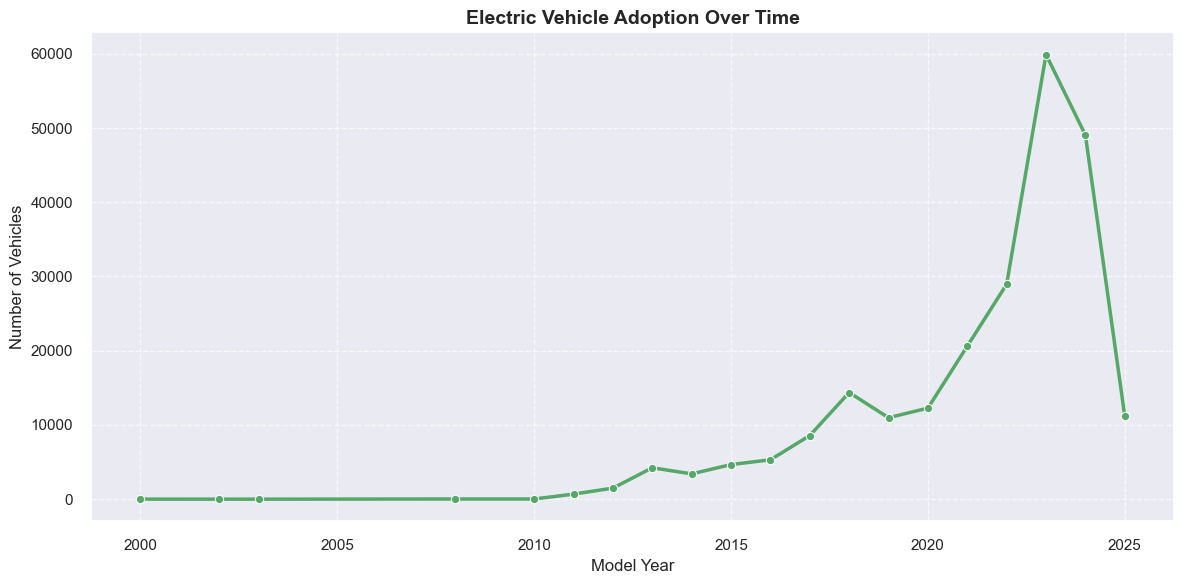

In [21]:
plt.figure(figsize=(12, 6))
yearly_counts = df['Model Year'].value_counts().sort_index()
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o', 
             linewidth=2.5, color='#55A868')
plt.title('Electric Vehicle Adoption Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Number of Vehicles', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

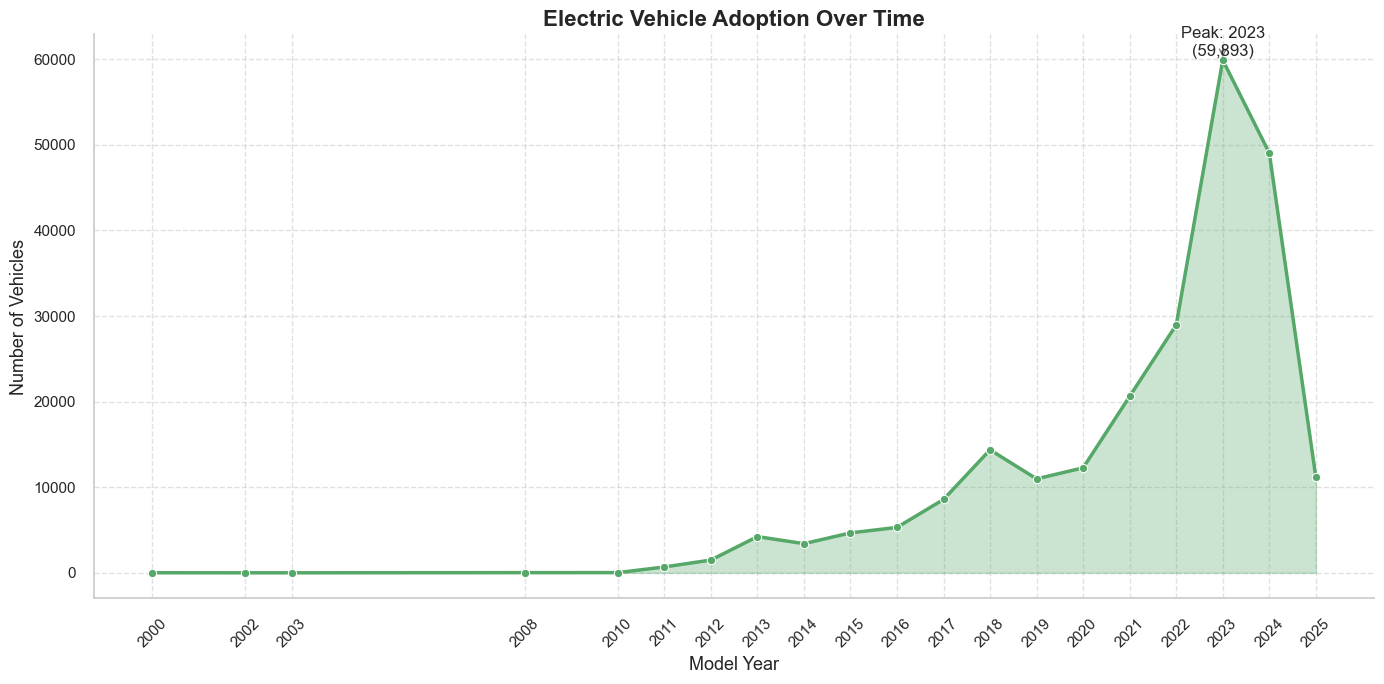

In [69]:
# Prepare data
yearly_counts = df['Model Year'].value_counts().sort_index()
yearly_df = pd.DataFrame({'Year': yearly_counts.index, 'Count': yearly_counts.values})

# Set plot style
sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))

# Line plot
ax = sns.lineplot(data=yearly_df, x='Year', y='Count', marker='o', linewidth=2.5, color='#55A868')

# Gradient fill under the line
ax.fill_between(yearly_df['Year'], yearly_df['Count'], alpha=0.3, color='#55A868')

# Highlight peak point
max_year = yearly_df.loc[yearly_df['Count'].idxmax()]
plt.annotate(f"Peak: {int(max_year['Year'])}\n({max_year['Count']:,})",
             xy=(max_year['Year'], max_year['Count']),
             xytext=(max_year['Year'], max_year['Count'] + 500),
             ha='center',
             arrowprops=dict(arrowstyle='->', color='gray'))

# Add title and labels
plt.title('Electric Vehicle Adoption Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Model Year', fontsize=13)
plt.ylabel('Number of Vehicles', fontsize=13)

# Format ticks
plt.xticks(yearly_df['Year'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
# Remove top and right spines
sns.despine()
plt.tight_layout()
plt.show()

<Axes: xlabel='Type', ylabel='Range'>

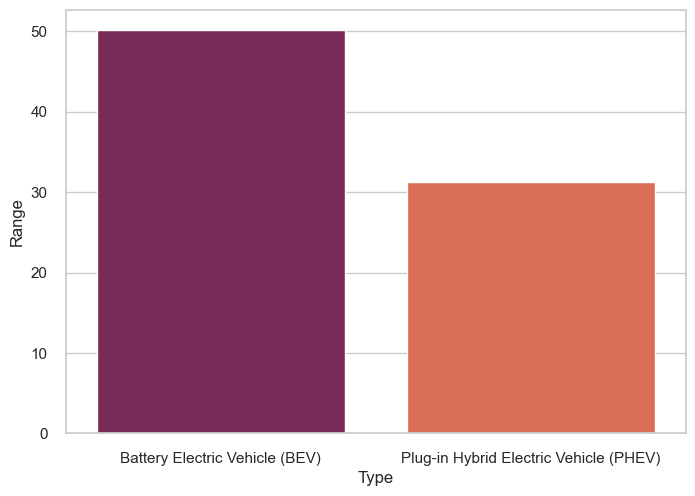

In [25]:
# Convert Series to DataFrame for better control
range_df = range_by_type.reset_index()
range_df.columns = ['Type', 'Range']

# Plot
sns.barplot(data=range_df, x='Type', y='Range', hue='Type', palette='rocket', legend=False)


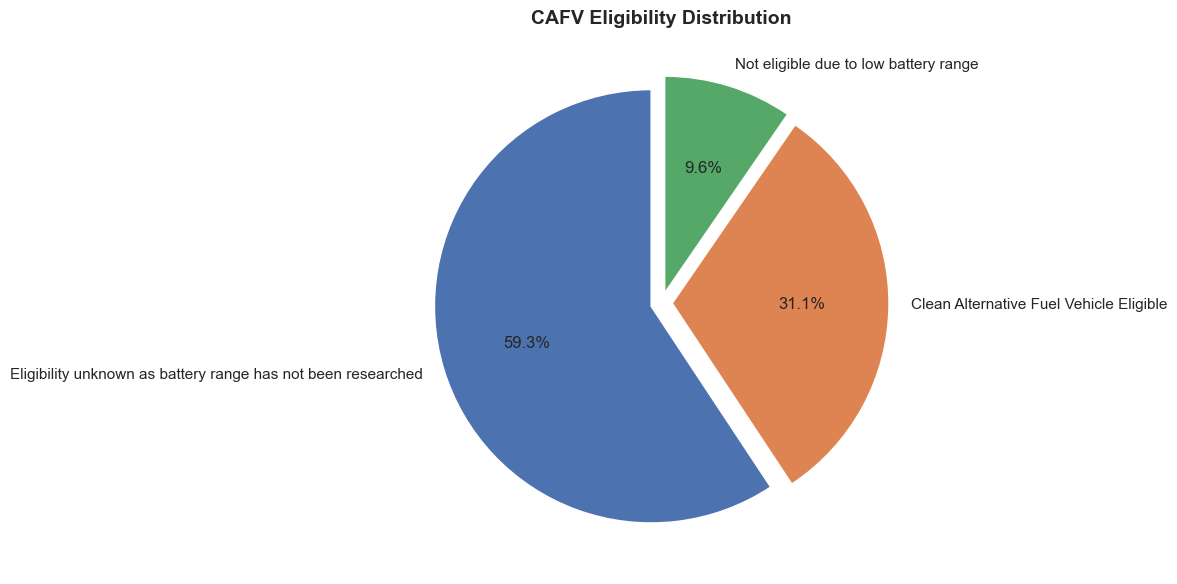

In [26]:
plt.figure(figsize=(10, 6))
cafv_counts = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
cafv_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                 colors=['#4C72B0', '#DD8452', '#55A868'], 
                 explode=(0.05, 0.05, 0.05))
plt.title('CAFV Eligibility Distribution', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

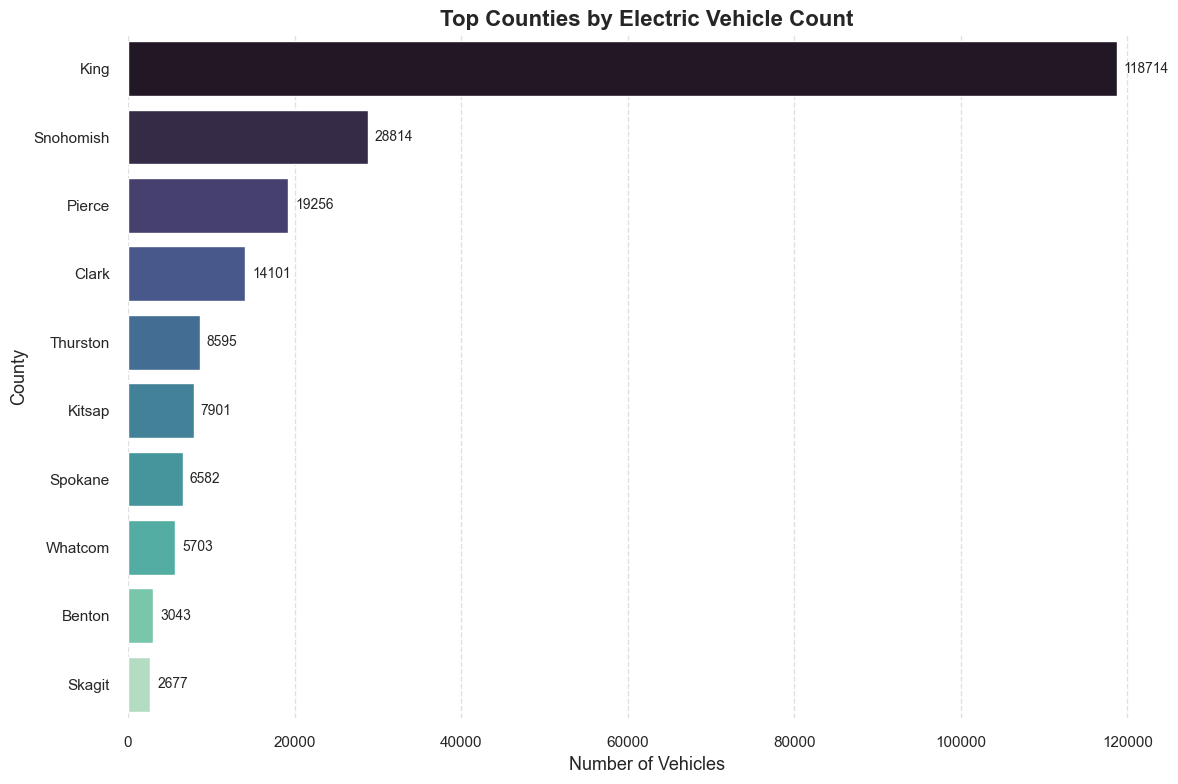

In [70]:
# Prepare data
top_counties_df = top_counties.reset_index()
top_counties_df.columns = ['County', 'Count']

# Set Seaborn style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Horizontal barplot
ax = sns.barplot(
    data=top_counties_df,
    x='Count',
    y='County',
    hue='County',
    palette='mako',
    legend=False
)

# Add value labels to bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=5, fontsize=10)

# Add titles and labels
plt.title('Top Counties by Electric Vehicle Count', fontsize=16, fontweight='bold')
plt.xlabel('Number of Vehicles', fontsize=13)
plt.ylabel('County', fontsize=13)

# Clean up the chart
plt.grid(axis='x', linestyle='--', alpha=0.6)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

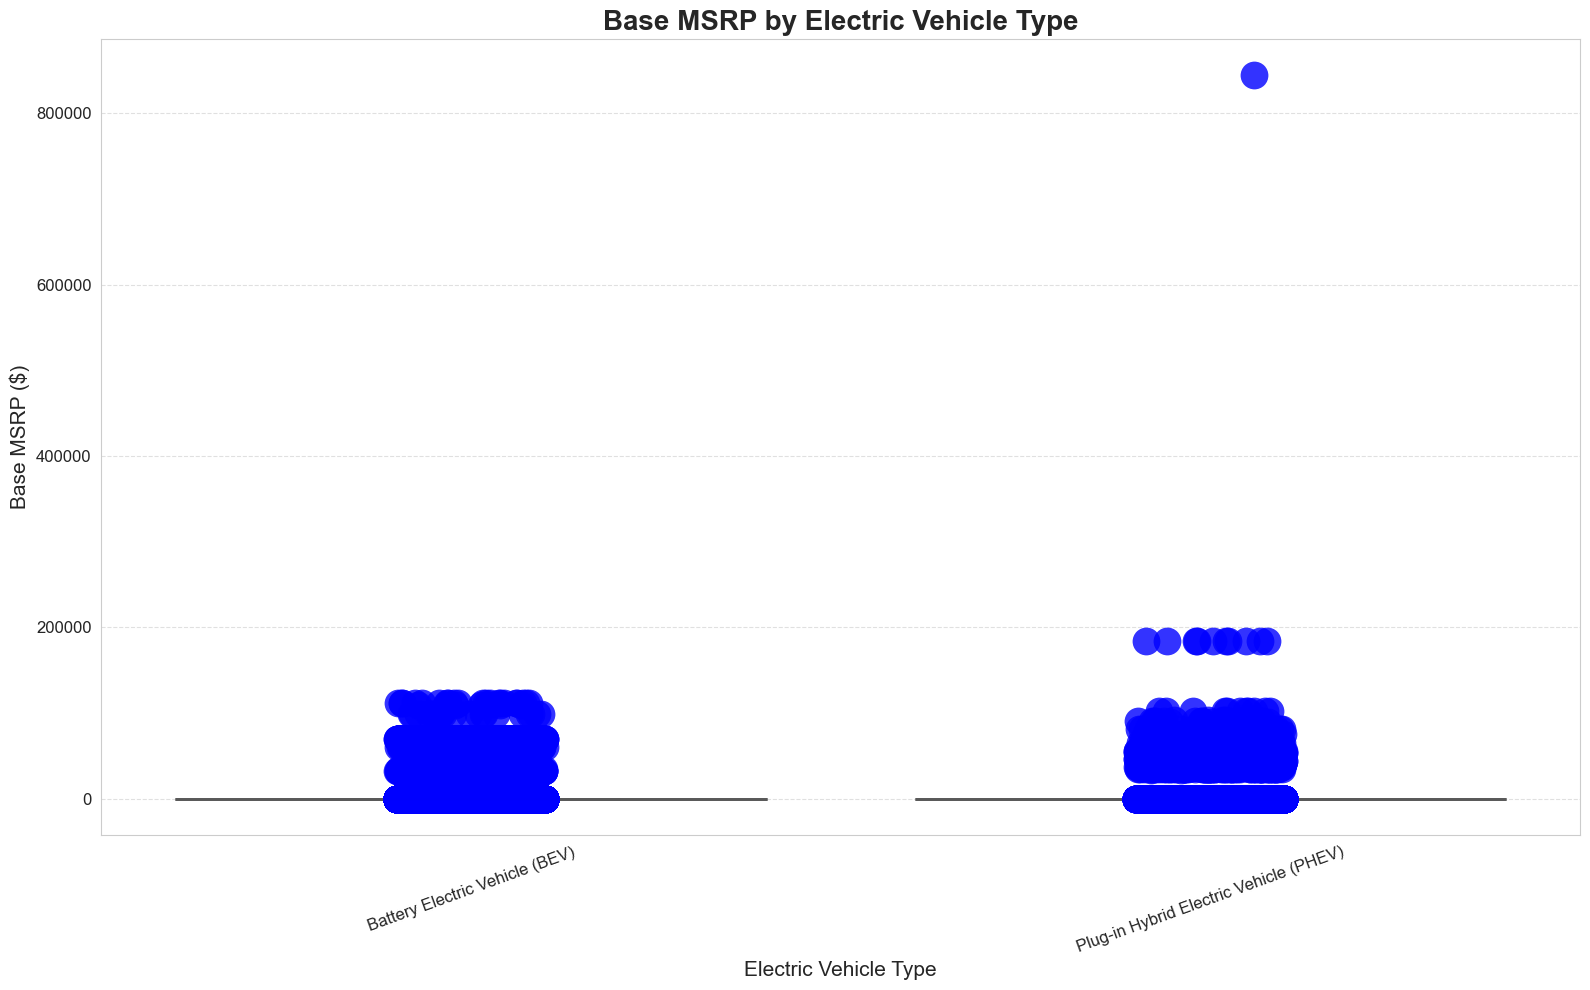

In [13]:


# Use emoji-supporting font (Windows: Segoe UI Emoji)
emoji_font = fm.FontProperties(fname="C:/Windows/Fonts/seguiemj.ttf")
plt.rcParams['font.family'] = emoji_font.get_name()

# Load data
price_data = pd.read_csv('C:\\Users\\Anand Kumar\\Downloads\\Electric_Vehicle_Population_Data (2).csv')  # Replace with your actual CSV path

# Set Seaborn style
sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))

# Convert to boxplot (fixes palette warning using `hue`)
ax = sns.boxplot(
    x='Electric Vehicle Type',
    y='Base MSRP',
    data=price_data,
    hue='Electric Vehicle Type',  # Required for palette
    palette='Set2',
    showfliers=False,
    linewidth=2
)

# Remove legend (redundant)
#ax.legend_.remove()

# Add jittered stripplot (optional)
sns.stripplot(
    data=price_data,
    x='Electric Vehicle Type',
    y='Base MSRP',
    color='blue',
    alpha=0.8,
    jitter=True,
    size=20
)

# Labels and titles
plt.title('Base MSRP by Electric Vehicle Type', fontsize=20, fontweight='bold')  # Emoji example
plt.xlabel('Electric Vehicle Type', fontsize=15)
plt.ylabel('Base MSRP ($)', fontsize=15)
plt.xticks(rotation=20, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [41]:
numeric_cols = df.select_dtypes(include=['float','int']).columns.tolist()


In [42]:
for col in numeric_cols:
    print('-' * 60)
    print(f"Column: {col}")
    print(f"Skewness: {df[col].skew():.2f}")
    print(f"Kurtosis: {df[col].kurt():.2f}")
    print('-' * 60)


------------------------------------------------------------
Column: Postal Code
Skewness: -29.44
Kurtosis: 912.08
------------------------------------------------------------
------------------------------------------------------------
Column: Model Year
Skewness: -1.27
Kurtosis: 1.05
------------------------------------------------------------
------------------------------------------------------------
Column: Electric Range
Skewness: 1.85
Kurtosis: 2.01
------------------------------------------------------------
------------------------------------------------------------
Column: Base MSRP
Skewness: 15.79
Kurtosis: 905.71
------------------------------------------------------------
------------------------------------------------------------
Column: Legislative District
Skewness: -0.43
Kurtosis: -1.12
------------------------------------------------------------
------------------------------------------------------------
Column: DOL Vehicle ID
Skewness: 0.06
Kurtosis: 3.92
-------

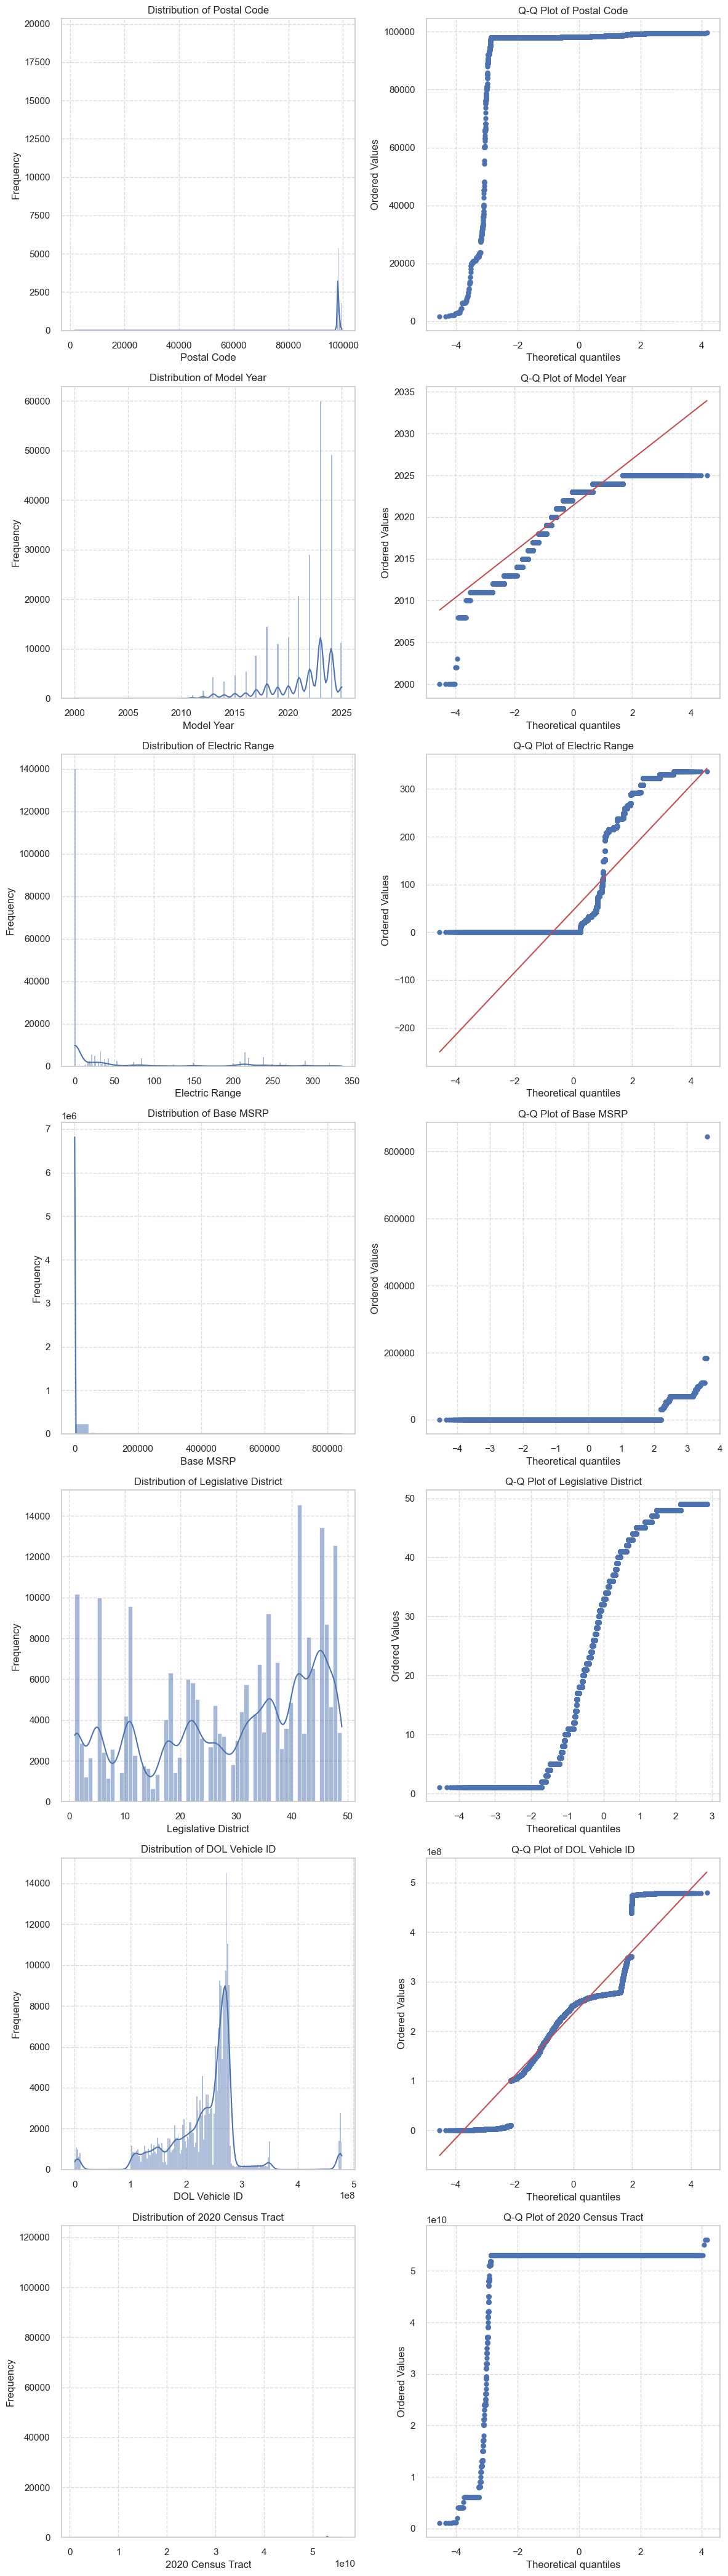

In [43]:
fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=2, figsize=(12, 6*len(numeric_cols)))

for i, col in enumerate(numeric_cols):
    # Histogram with KDE
    sns.histplot(df[col], kde=True, ax=axes[i,0], color='#4C72B0')
    axes[i,0].set_title(f'Distribution of {col}', fontsize=12)
    axes[i,0].set_xlabel(col)
    axes[i,0].set_ylabel('Frequency')
    axes[i,0].grid(True, linestyle='--', alpha=0.7)
    
    # Q-Q plot
    probplot(df[col], plot=axes[i,1])
    axes[i,1].set_title(f'Q-Q Plot of {col}', fontsize=12)
    axes[i,1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


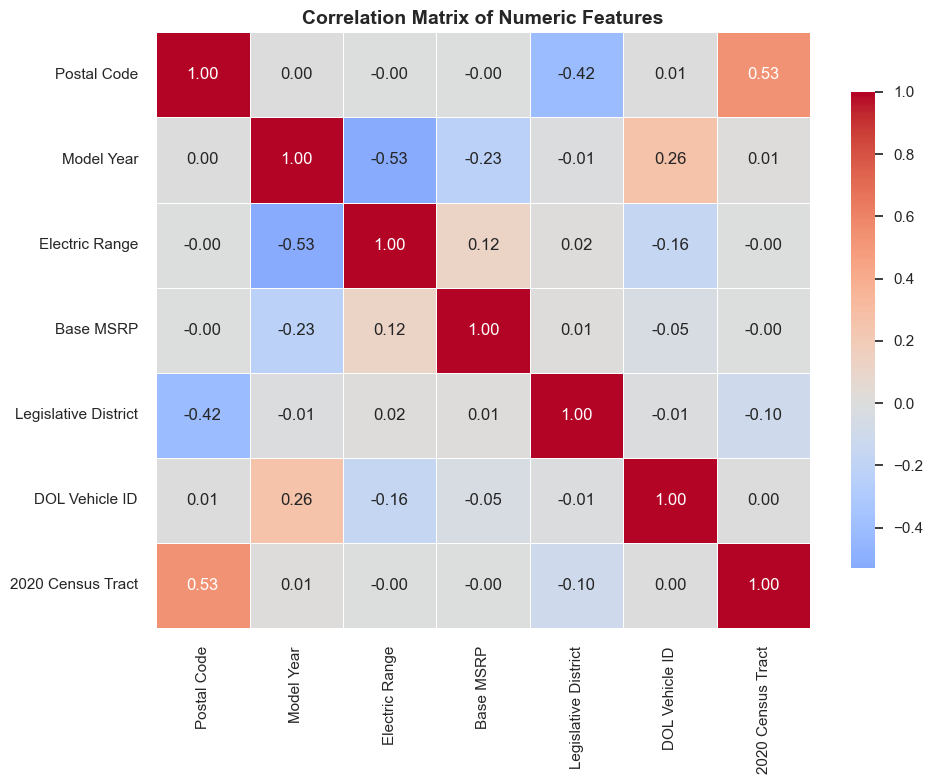

In [44]:
plt.figure(figsize=(10, 8))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Numeric Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

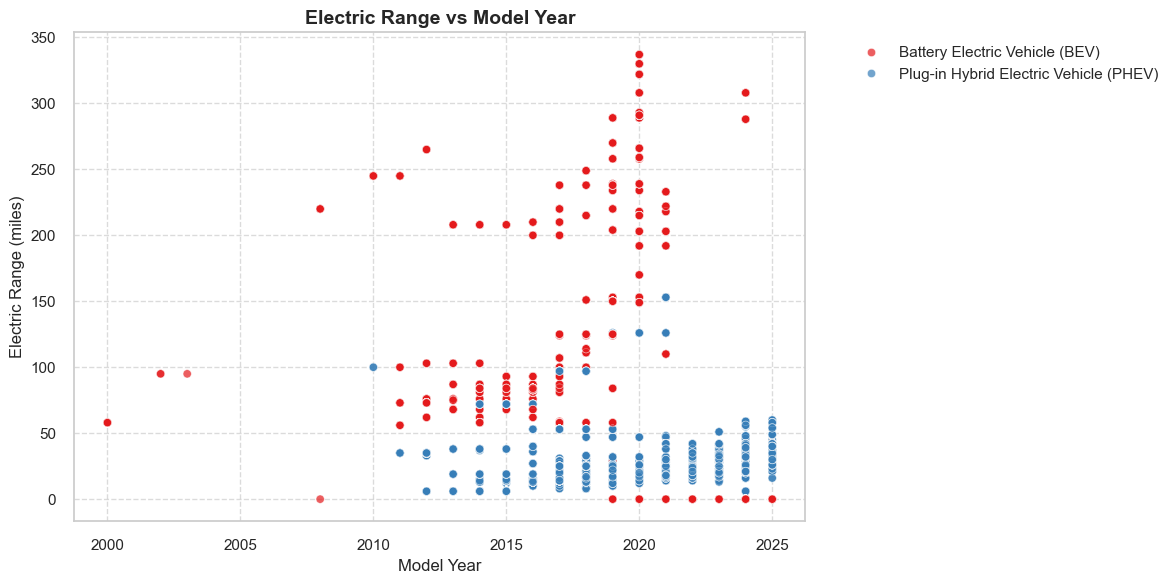

In [45]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Model Year', y='Electric Range', data=df, 
                hue='Electric Vehicle Type', palette='Set1', alpha=0.7)
plt.title('Electric Range vs Model Year', fontsize=14, fontweight='bold')
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Electric Range (miles)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


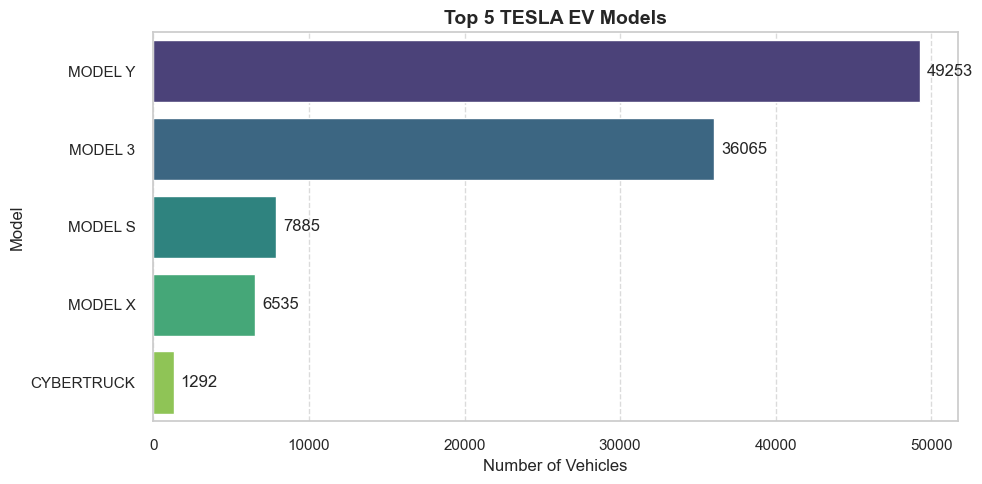

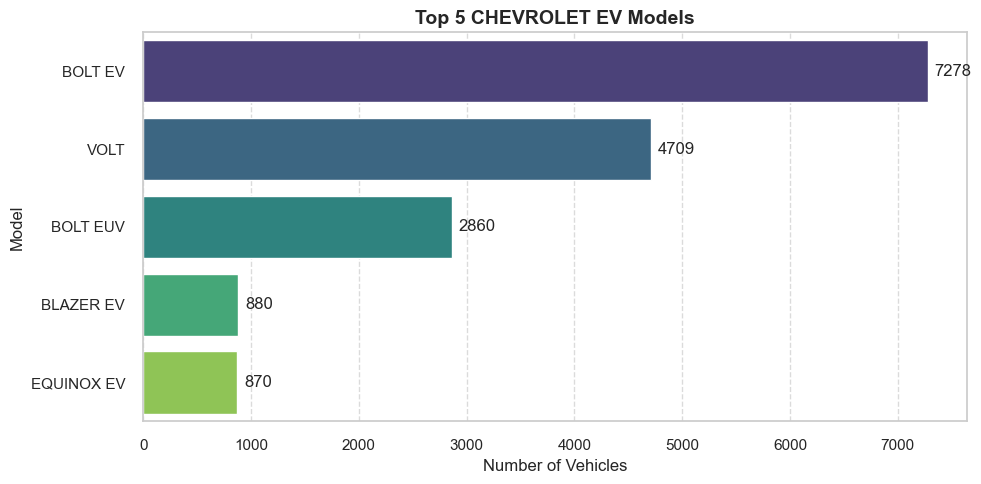

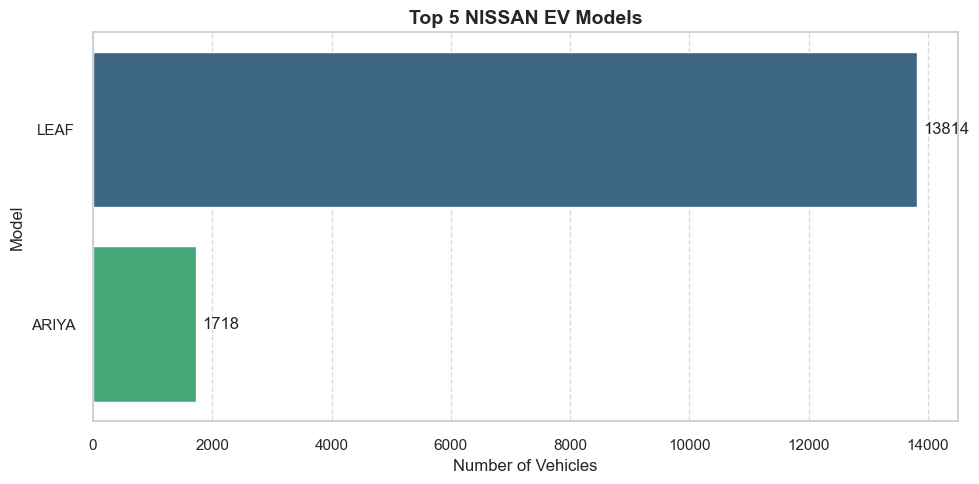

In [66]:
top_makes_list = top_makes.index.tolist()

for make in top_makes_list[:3]:  # Analyze top 3 manufacturers
    make_data = df[df['Make'] == make]
    top_models = make_data['Model'].value_counts().nlargest(5)
    
    # Convert to DataFrame so we can use hue
    top_models_df = top_models.reset_index()
    top_models_df.columns = ['Model', 'Count']
    
    plt.figure(figsize=(10, 5))
    sns.set_style("whitegrid")
    
    # Add hue to apply palette safely
    ax = sns.barplot(
        data=top_models_df,
        x='Count',
        y='Model',
        hue='Model',
        palette="viridis",
        dodge=False,
        legend=False
    )

    # Optional: Add labels to bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', padding=5)

    plt.title(f'Top 5 {make} EV Models', fontsize=14, fontweight='bold')
    plt.xlabel('Number of Vehicles', fontsize=12)
    plt.ylabel('Model', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()



<Axes: xlabel='Legislative District', ylabel='Count'>

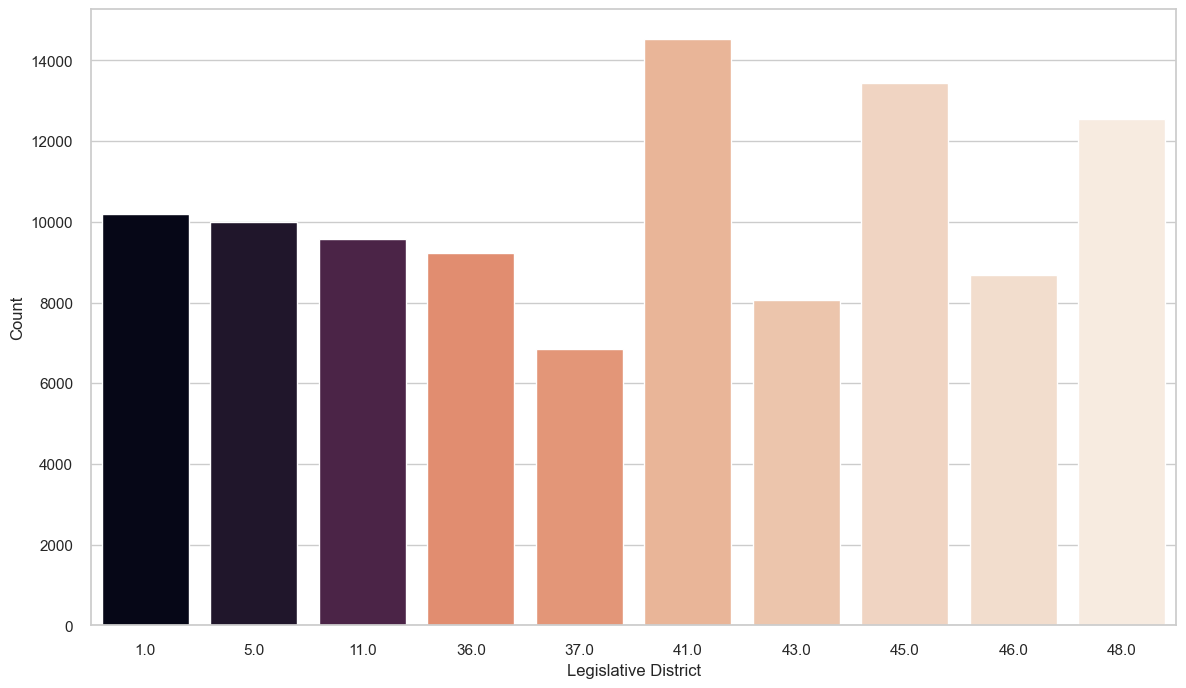

In [74]:
leg_dist_df = leg_dist_counts.reset_index()
leg_dist_df.columns = ['Legislative District', 'Count']
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

sns.barplot(
    data=leg_dist_df,
    x='Legislative District',
    y='Count',
    hue='Legislative District',  
    palette='rocket',
    dodge=False,
    legend=False                  
)


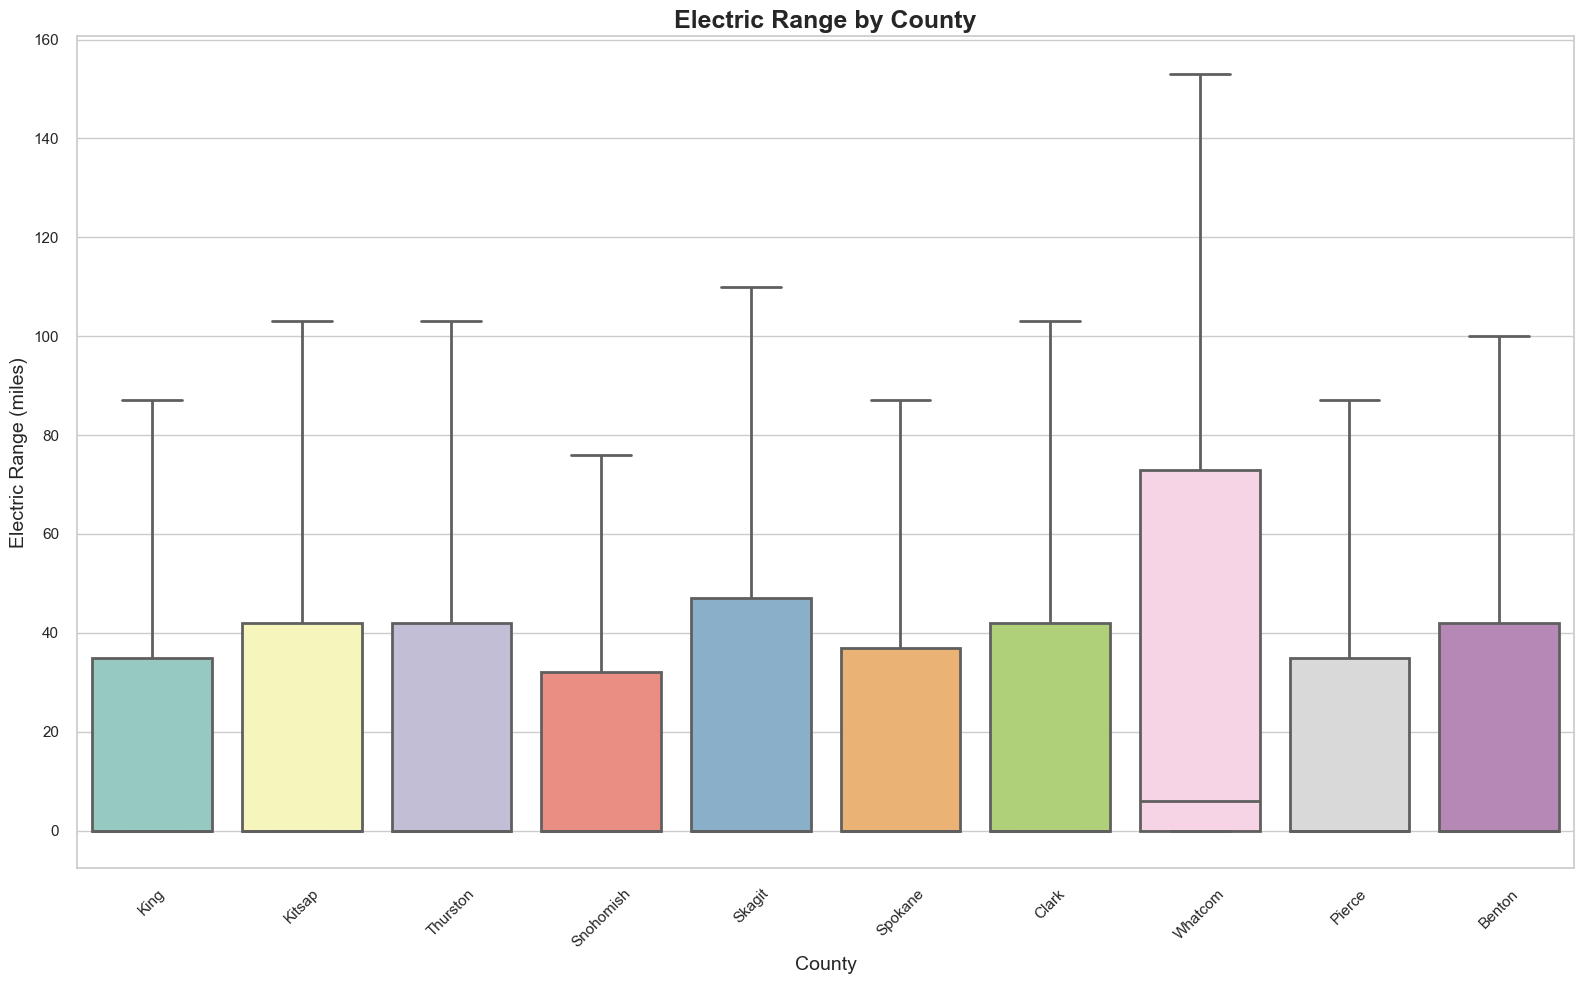

In [60]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")

sns.boxplot(
    x='County',
    y='Electric Range',
    data=county_range_data,
    hue='County',
    palette='Set3',
    legend=False,
    linewidth=2,
    showfliers=False
)

plt.title('Electric Range by County', fontsize=18, fontweight='bold')
plt.xlabel('County', fontsize=14)
plt.ylabel('Electric Range (miles)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

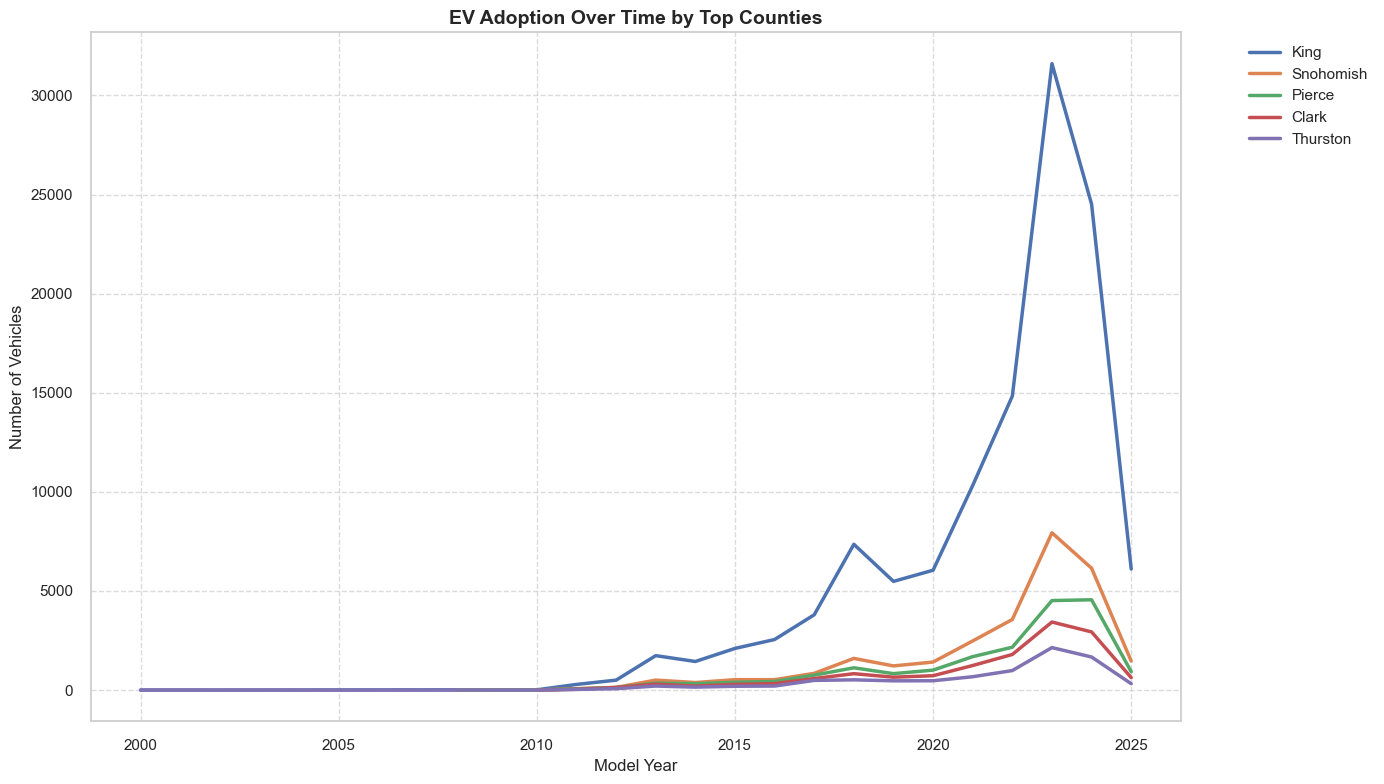

In [49]:
plt.figure(figsize=(14, 8))
for county in top_counties_list[:5]:  # Plot top 5 counties
    county_data = df[df['County'] == county]
    yearly_count = county_data['Model Year'].value_counts().sort_index()
    sns.lineplot(x=yearly_count.index, y=yearly_count.values, 
                 label=county, linewidth=2.5)
    
plt.title('EV Adoption Over Time by Top Counties', fontsize=14, fontweight='bold')
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Number of Vehicles', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [19]:
sns.barplot(x=top_utilities.values, y=top_utilities.index, palette="mako", dodge=False, legend=False)

NameError: name 'top_utilities' is not defined